In [28]:
include("MDBM__types.jl")
using Plots
gr()

Plots.GRBackend()

7917
  0.003377 seconds (39.52 k allocations: 3.553 MiB)
1 cuccc happening  0.724701 seconds (3.48 M allocations: 108.617 MiB, 7.37% gc time)
  0.001663 seconds (20.09 k allocations: 1.611 MiB)
1 cuccc happening  0.335843 seconds (1.59 M allocations: 50.057 MiB, 5.98% gc time)
1210


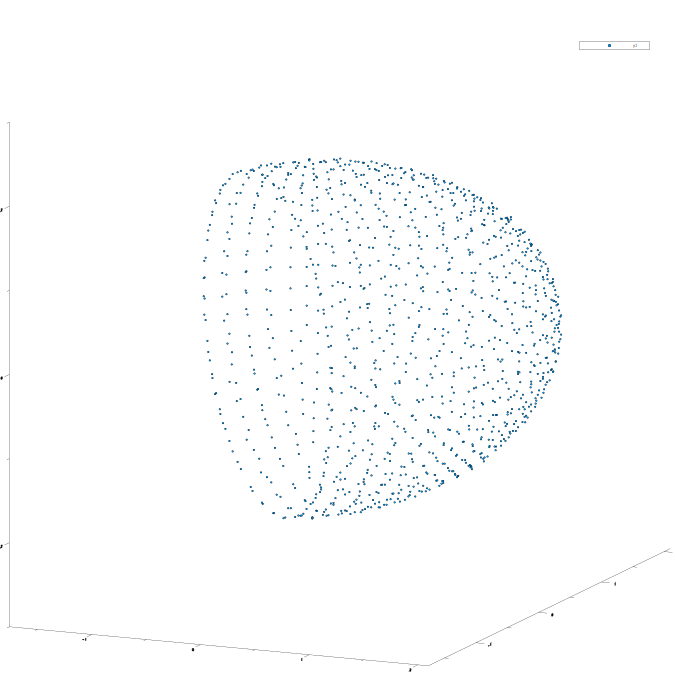

In [37]:

ax1=Axis(-5:5.0,"x")
ax2=Axis(-7:1:7.0,"y")
ax3=Axis(-3:3.0,"z")

# ax1=Axis(1:5.0,"x")
# ax2=Axis(10:10:80.0,"y")
# ax3=Axis(1:10.0,"z")

mdbmaxes=[ax1,ax2,ax3]

function f(x,y,z)
    [x*x+y*y+z*z-2.0*2.0]
end

function c(x,y,z)
    y+x+0.5
end

# [mdbm.f,mdbm.c].(1.2,2.3,4.5)
# mdbm.c.memoryacc[1]
axdoubling!.(mdbmaxes)
println(prod([length(mdbmaxes[i].ticks) for i in 1:3]))
# @time mdbm=MDBM_Problem(f,mdbmaxes,constraint=c,memoization=false)
@time mdbm=MDBM_Problem(f,mdbmaxes,constraint=c)
@time interpolate!(mdbm,interpolationorder=1)
for kstep=1:3
@time refine!(mdbm)
@time interpolate!(mdbm,interpolationorder=1)
# println(length(mdbm.axes[1].ticks))
# println(length(mdbmaxes[1].ticks))
# println(length(ax1.ticks))
end
# # plotlyjs()
# # unicodeplots()
 x,y,z=getinterpolatedpoint(mdbm)
 println(length(x))
 scatter(x,y,z,size = (2700, 2700))

  0.000816 seconds (4.19 k allocations: 259.244 KiB)
1 cuccc happening  0.013467 seconds (30.71 k allocations: 1.088 MiB)
  0.000090 seconds (642 allocations: 43.656 KiB)
1 cuccc happening  0.004231 seconds (17.53 k allocations: 649.047 KiB)
  0.000079 seconds (1.05 k allocations: 72.422 KiB)
1 cuccc happening  0.006999 seconds (29.31 k allocations: 1.032 MiB)
  0.008941 seconds (2.00 k allocations: 140.906 KiB, 97.57% gc time)
1 cuccc happening  0.013666 seconds (56.78 k allocations: 2.028 MiB)
114


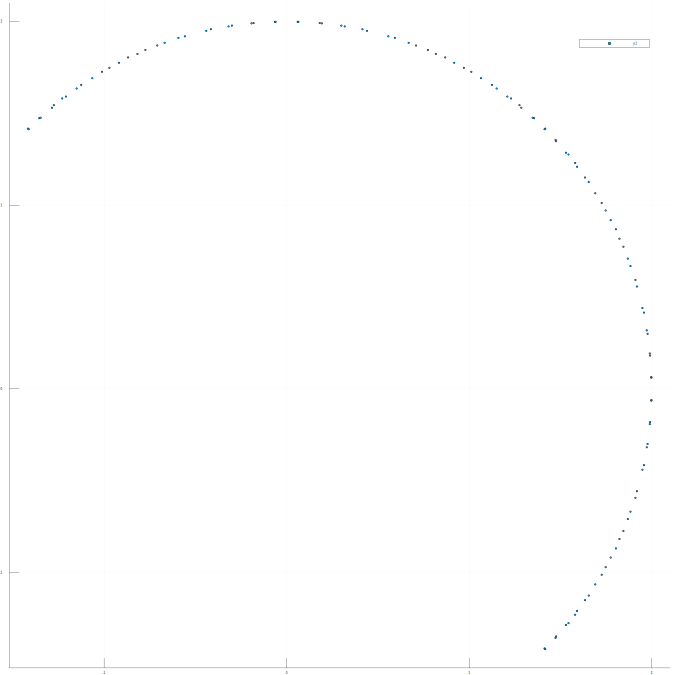

In [34]:
ax1=Axis(-5:5.0,"x")
ax2=Axis(-7:1:7.0,"y")

mdbmaxes=[ax1,ax2]

function f(x,y)
    [x*x+y*y-2.0*2.0]
end

function c(x,y)
    y+x
end
interporder=1;#0

@time mdbm=MDBM_Problem(f,mdbmaxes,constraint=c)
@time interpolate!(mdbm,interpolationorder=interporder)
for kstep=1:3
    @time refine!(mdbm)
    @time interpolate!(mdbm,interpolationorder=interporder)
end
x,y=getinterpolatedpoint(mdbm)
println(length(x))
scatter(x,y,size = (2700, 2700))

In [ ]:
using Makie


In [ ]:
Pkg.build("GLFW")

In [ ]:
 x = rand(10)
 y = rand(10)
 colors = rand(10)

 scene = scatter(x, y, color = colors)

In [ ]:
scene = Scene()

In [25]:
println(length(mdbm.f.fvalarg))
println(mdbm.f.memoryacc)

341332
[1265324]
